## Samsumg Health Data Trends for a MYSTERY PERSON. 

### How much can we learn about a person from a personal health device dataset? 
### A Python data analysis project. 

* The Python datetime, numpy, pandas, matplotlib and seaborn packages were used to analyze the files below.
  - [calories_burned](https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/calories_burned.csv)
  - [day_summary](https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/day_summary.csv)
  - [exercise](https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/Exercise.csv)
  - [floors_climbed](https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/floors_climbed.csv)
  - [heart_rate](https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/heart_rate.csv)
  - [sleep](https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/sleep.csv)
  - [step_count](https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/step_count.csv)
  - [step_daily_trend](https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/step_daily_trend.csv)
  - [stress](https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/stress.csv)


* **Salient resuls of this analysis were**: Individual is a moderately active 43 year old man who, a Canadian, who would likely live in New Brunswick, Nova Scotia or Prince Edward Island in a populated area. Multiple visits, including one around Christmas to a particular timezone gave us general location information of individual's family home as well as current home. Daily activities and Vacation activities were easy to study. In addition, I identified the dates of a personal life traumatic event and the extent of negative influence it had on the individual's well-being. 
* We can thus learn a good amount about a person from personal health device information. 


* [Data documentation](https://developer.samsung.com/onlinedocs/health/index.html?com/samsung/android/sdk/healthdata/HealthConstants.Exercise.html)



* Dependancies 
  - Python 3.7 
  - [requirements file](https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/requirements.txt)

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import numpy as np
%matplotlib inline

### Functions

In [2]:
# Explore dataset
def explore(df):
    print('\nHead')
    print(df.head())
    print('\nInfo')
    print(df.info())
    print('\nNunique')
    print([(col,df[col].nunique()) for col in df.columns])
    print('\nDescribe')
    print(df.describe())
        
# Function to apply the time offset to datetime columns
def offset(dataframe,columnname_offset,columnname_torewrite):
    column_offset=[]
   
    # Function to extract the hours and minutes part of time_offset string
    hr= lambda a : int(a[3:6])
    mins= lambda a : int(a[3]+a[6:8])
    
    # Loop through the datetime column that must be modified
    for i in dataframe.index:
        
        # Apply hour and minute extraction function
        hour=(hr(dataframe[columnname_offset][i]))
        minute=(mins(dataframe[columnname_offset][i]))
        
        # Ensure column to be modified is a Timestamp
        human_readable_time=pd.to_datetime(dataframe[columnname_torewrite][i])
        
        #Subtract time offset
        new_time=human_readable_time+datetime.timedelta(hours=hour, minutes=minute )
        
        #Append new Timestamp values to a list.
        column_offset.append(new_time)
    return column_offset

### Load data

In [3]:
sleep=pd.read_csv('https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/sleep.csv')
exercise=pd.read_csv('https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/Exercise.csv')
day=pd.read_csv('https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/day_summary.csv')
calories=pd.read_csv('https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/calories_burned.csv')
floors=pd.read_csv('https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/floors_climbed.csv')
heartrate=pd.read_csv('https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/heart_rate.csv')
step=pd.read_csv('https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/step_count.csv')
steptrend=pd.read_csv('https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/step_daily_trend.csv')
stress=pd.read_csv('https://raw.githubusercontent.com/odas/lantern-toronto/master/python/data/stress.csv')

### Pre-processing

In [4]:
# Drop unnecessary columns
sleep.drop(['Unnamed: 0','com.samsung.health.sleep.datauuid',"com.samsung.health.sleep.create_time",'original_efficiency',
            'original_bed_time','has_sleep_data','com.samsung.health.sleep.pkg_name',
            'com.samsung.health.sleep.custom','original_wake_up_time','quality','extra_data',
            'com.samsung.health.sleep.update_time','com.samsung.health.sleep.comment'], axis=1, inplace=True)
exercise.drop(['Unnamed: 0','max_rpm','live_data', 'mean_rpm', 'max_caloricburn_rate', 'additional', 'update_time',
               'datauuid', 'location_data', 'decline_distance', 'mean_caloricburn_rate', 'create_time', 'max_power', 
               'pkg_name', 'mean_power','comment','exercise_custom_type'], axis=1,inplace=True)
day.drop(['Unnamed: 0','create_time','pkg_name','update_time','datauuid','extra_data'], axis=1,inplace=True)
calories.drop(['Unnamed: 0', 'datauuid', 'tef_calorie', 'pkg_name', 'update_time', 'create_time'], axis=1,inplace=True)
floors.drop(["Unnamed: 0",'create_time','update_time','pkg_name', 'datauuid', 'custom'], axis=1, inplace=True)
heartrate.drop(["Unnamed: 0","create_time",'custom','update_time',
                          'binning_data', 'pkg_name', 'datauuid','comment', 'max','min'], axis=1, inplace=True)
step.drop(['Unnamed: 0','create_time','custom','pkg_name','update_time','datauuid','sample_position_type'], axis=1,inplace=True)
stress.drop(['Unnamed: 0','create_time','max','custom','pkg_name','update_time','min','binning_data',
             'datauuid','comment','algorithm'], axis=1,inplace=True)
steptrend.drop(['Unnamed: 0','create_time','pkg_name','update_time','binning_data','datauuid','source_pkg_name'], axis=1,inplace=True)


# Rename some columns
sleep.columns=['efficiency', 'time_offset', 'end_time','deviceuuid','start_time']

# Add or modify some columns
sleep['duration']=(sleep['end_time']-sleep['start_time'])/(1000*60*60)
exercise['duration']=exercise['duration']/(1000*60*60)
exercise['exercise_type']=exercise['exercise_type'].map({1001:'Walking',1002:'Running',9002:'Yoga',11007:'Cycling',13001:'Hiking',
               15006:'Elliptical',14001:'Swimming',0:'Other Activities'})

# Apply the offset and create new columns. 
sleep['end_time']=pd.to_datetime(sleep['end_time'], unit='ms')
sleep['start_time']=pd.to_datetime(sleep['start_time'], unit='ms')
sleep['offset_starttime']=offset(sleep, 'time_offset', 'start_time')
sleep['offset_endtime']=offset(sleep, 'time_offset', 'end_time')
step['offset_starttime']=offset(step, 'time_offset', 'start_time')
step['offset_endtime']=offset(step, 'time_offset', 'end_time')
floors['offset_starttime']=offset(floors, 'time_offset', 'start_time')
floors['offset_endtime']=offset(floors, 'time_offset', 'end_time')
stress['offset_starttime']=offset(stress, 'time_offset', 'start_time')
stress['offset_endtime']=offset(stress, 'time_offset', 'end_time')
heartrate['offset_starttime']=offset(heartrate, 'time_offset', 'start_time')
heartrate['offset_endtime']=offset(heartrate, 'time_offset', 'end_time')

# Ensure the rest of the datetime columns are Timestamps
exercise['end_time']=pd.to_datetime(exercise['end_time'])
exercise['start_time']=pd.to_datetime(exercise['start_time'])
day['day_time']=pd.to_datetime(day['day_time'], unit='ms')
calories['day_time']=pd.to_datetime(calories['day_time'], unit='ms')
steptrend['day_time']=pd.to_datetime(steptrend['day_time'], unit='ms')

# Set appropriate datetime columns as index.
sleep=sleep.set_index('offset_starttime')
exercise=exercise.set_index('start_time')
day=day.set_index('day_time')
calories=calories.set_index('day_time')
floors=floors.set_index('offset_starttime')
heartrate=heartrate.set_index('offset_starttime')
step=step.set_index('offset_starttime')
stress=stress.set_index('offset_starttime')
steptrend=steptrend.set_index('day_time')

# Sort values by datetime column
sleep=sleep.sort_index()
exercise=exercise.sort_index()
day=day.sort_index()
calories=calories.sort_index()
floors=floors.sort_index()
heartrate=heartrate.sort_index()
step=step.sort_index()
stress=stress.sort_index()
steptrend=steptrend.sort_index()

## Explore

In [5]:
# Creating dictionaries of datasets for batch analsis operations.  
dict1={'exercise':exercise,'day':day,'calories':calories,'steptrend':steptrend,'step':step,
       'sleep':sleep,'heartrate':heartrate,'floors':floors,'stress':stress}
dict2={'exercise':exercise,'step':step,'sleep':sleep,'floors':floors,'stress':stress}

### Devices used over timerange, from all datasets. 


 EXERCISE 



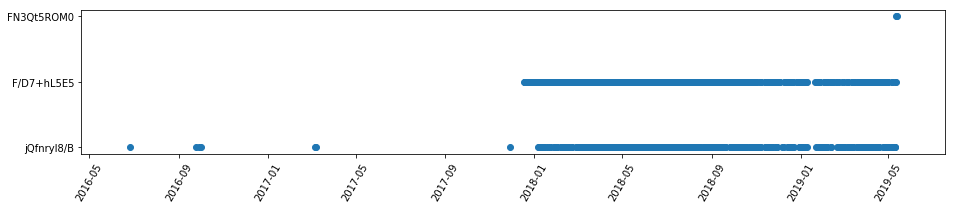


 DAY 



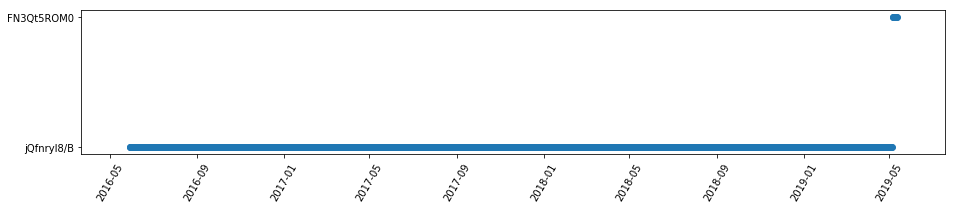


 CALORIES 



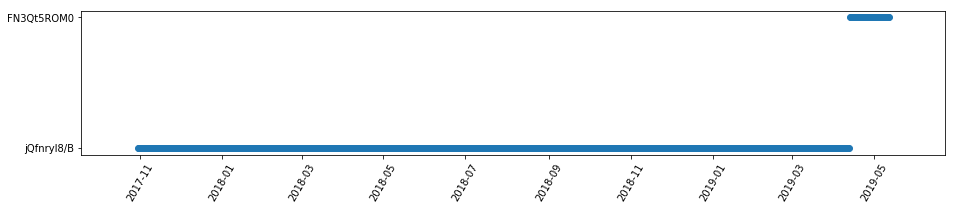


 STEPTREND 



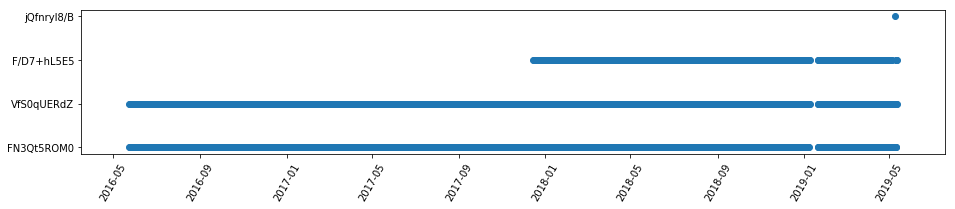


 STEP 



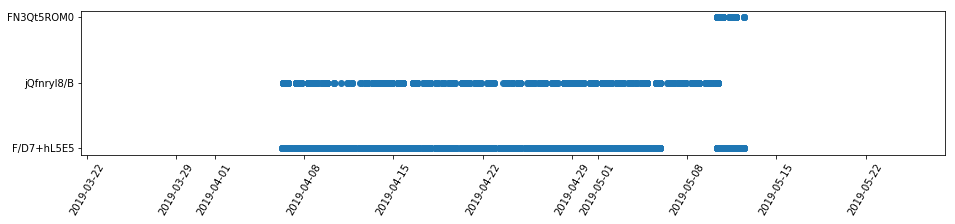


 SLEEP 



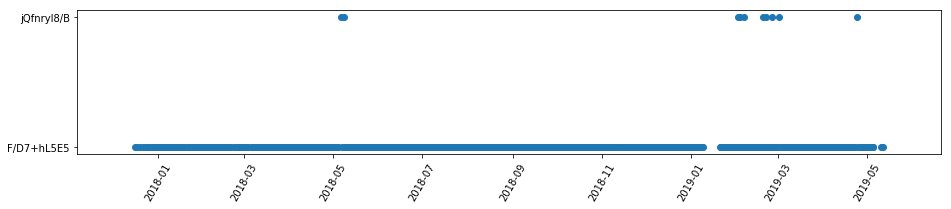


 HEARTRATE 



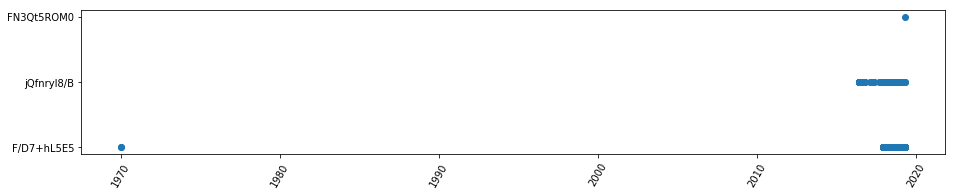


 FLOORS 



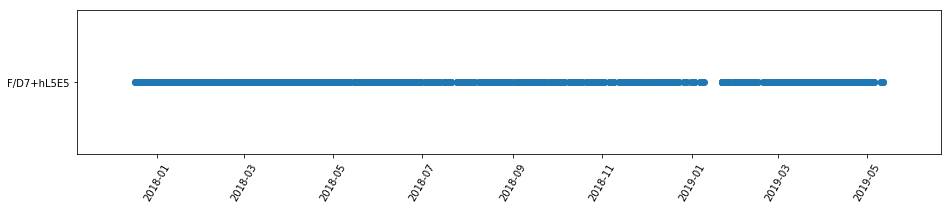


 STRESS 



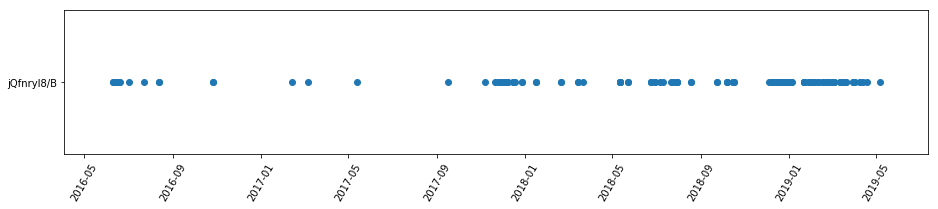

In [6]:
for key,item in dict1.items():
    print('\n',key.upper(),'\n')
    plt.axes([0,0,2,0.5])
    plt.scatter(item.index, item['deviceuuid'])
    plt.xticks(rotation=60)
    #plt.xlim('2016-05-01','2019-05-01')
    plt.show()

* **Devices used**
    - 'F/D7+hL5E5' : Person purchased a wrist device in start of 2018. 
        - (We know it is a wrist device based on a 'tag-id' in the steptrend dataset. This device measures altitude very accurately (floors, altitude in exercise dataset). 
        - It also measures heartrate, sleep data and step data. 
        - This could be a wrist watch associated with a phone. 

    - 'jQfnryl8/B' : measures stress (generally measured from heartrate and blood oxygen saturation) and also appears prominently in the heartrate dataset.
        - This device is bad at identifying time_offset, especially in the early part of the data. 
    
    - 'FN3Qt5ROM0' : is used as a replacement device at the end of 2019. 
        - It is used to replace data from 'jQfnryl8/B' (step_count dataset, later in the analysis, best shows this result.)
        - The step_daily_trend dataset has reading from this device throughout the timerange. But all the other more recent datasets are missing data from this device. 
            - This suggests that 'FN3Qt5ROM0' may be an older device that was used by the individual, perhaps when the newer device 'jQfnryl8/B' was broken/lost/unavailable. 

    - **'VfS0qUERdZ' shows up in only the step_trend_daily dataset and has been ignored from analysis.** 
   

### Time offset over timerange, from all datasets. 

Text(0.9, 0.8, 'Vacation (family?)')

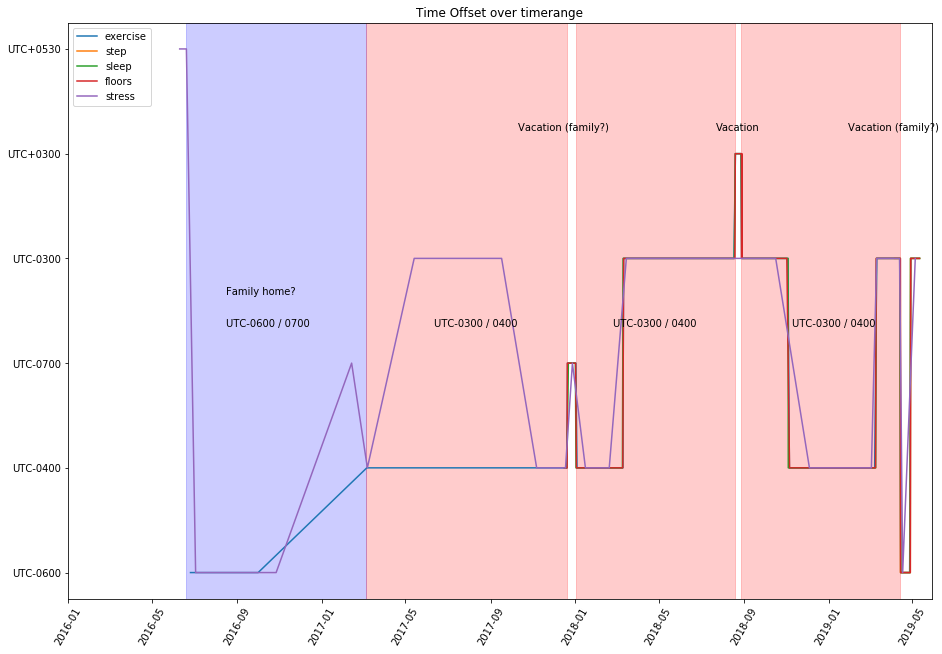

In [7]:
plt.axes([0,0,2,2])
for key,item in dict2.items():
    plt.plot(item.index, item['time_offset'], label=key)
plt.title('Time Offset over timerange') 
plt.legend()
plt.xticks(rotation=60)
plt.xlim('2016','2019-05-30')
plt.axvspan('2016-06-19','2017-03-06', color='blue', alpha=0.2)
plt.axvspan('2017-03-06','2017-12-20', color='red', alpha=0.2)
plt.axvspan('2018-01-02','2018-08-19', color='red', alpha=0.2)
plt.axvspan('2018-08-28','2019-04-14', color='red', alpha=0.2)
plt.annotate('Family home?', xy=(.24,0.55), xycoords='figure fraction')
plt.annotate('UTC-0600 / 0700', xy=(.24,0.5), xycoords='figure fraction')
plt.annotate('UTC-0300 / 0400', xy=(.46,0.5), xycoords='figure fraction')
plt.annotate('Vacation (family?)', xy=(.55,0.8), xycoords='figure fraction')
plt.annotate('UTC-0300 / 0400', xy=(.65,0.5), xycoords='figure fraction')
plt.annotate('Vacation', xy=(.76,0.8), xycoords='figure fraction')
plt.annotate('UTC-0300 / 0400', xy=(.84,0.5), xycoords='figure fraction')
plt.annotate('Vacation (family?)', xy=(.9,0.8), xycoords='figure fraction')

Text(0.5, 1.0, 'Timezone change on 10th March, 2019')

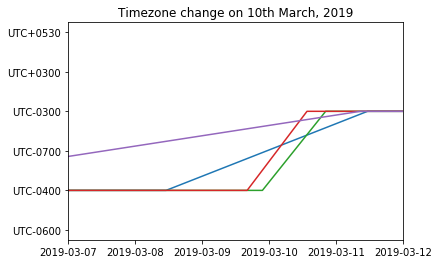

In [8]:
for key,item in dict2.items():
    plt.plot(item.index, item['time_offset'], label=key)
plt.xlim('2019-03-07','2019-03-12')
plt.title('Timezone change on 10th March, 2019')

* **Timezone at home and Vacations**
    - The individual originally lives in the UTC-0600/UTC-0700 timezone (Atlantic Time)
    
    - Moves to the UTC-0300/UTC-0400 timezone around 2017-03-06. 
        - Perhaps a move for work? A student moving out of their home?
        
    - Individual is Canadian or lives in Bermuda. This is because, so far east of North America, there are only a limited number of regions that follow Atlantic time. Only the Canadian provinces and Bermuda enjoy Daylight saving. 
   
    - The individual takes a short vacation back to the UTC-0600/UTC-0700 timezone between 2017-12-20 and 2018-01-02. 
        - The timing of this vacation around the winter holiday time strongly suggests that the person's home is in 
        the UTC-0600/UTC-0700 timezone. 
    
    - The individual takes a second vacation between 2018-08-19 and 2018-08-28 to place in the UTC+0300 timezone. 
    

* **Timerange for further analysis**
    - Majority of datapoints in the datasets are from after 2017-09. 
        - **So a subset of data after 2017-09 has been used for more detailed analysis.**

### Examining Timerange of available data. 

In [9]:
for key,item in dict1.items():
    print('\n',key.upper(),'\n')
    print('TIME-RANGE: ', item.index.min().date(),' TO ', item.index.max().date())
    print('2016 to 2017-08-31: ',item['2016':'2017-08-31'].iloc[:,0].count())
    print('2017-09-01 to 2018-12: ',item['2017-09-01':'2018'].iloc[:,0].count())
    print('2019 and later: ',item['2019':].iloc[:,0].count())


 EXERCISE 

TIME-RANGE:  2016-06-25  TO  2019-05-12
2016 to 2017-08-31:  6
2017-09-01 to 2018-12:  838
2019 and later:  180

 DAY 

TIME-RANGE:  2016-05-29  TO  2019-05-12
2016 to 2017-08-31:  460
2017-09-01 to 2018-12:  487
2019 and later:  132

 CALORIES 

TIME-RANGE:  2017-10-30  TO  2019-05-12
2016 to 2017-08-31:  0
2017-09-01 to 2018-12:  428
2019 and later:  132

 STEPTREND 

TIME-RANGE:  2016-05-24  TO  2019-05-12
2016 to 2017-08-31:  930
2017-09-01 to 2018-12:  1349
2019 and later:  358

 STEP 

TIME-RANGE:  2019-04-06  TO  2019-05-12
2016 to 2017-08-31:  0
2017-09-01 to 2018-12:  0
2019 and later:  9093

 SLEEP 

TIME-RANGE:  2017-12-16  TO  2019-05-11
2016 to 2017-08-31:  0
2017-09-01 to 2018-12:  498
2019 and later:  164

 HEARTRATE 

TIME-RANGE:  1969-12-31  TO  2019-05-12
2016 to 2017-08-31:  19
2017-09-01 to 2018-12:  15550
2019 and later:  8707

 FLOORS 

TIME-RANGE:  2017-12-16  TO  2019-05-11
2016 to 2017-08-31:  0
2017-09-01 to 2018-12:  1175
2019 and later:  343

 S

* Few datasets have information in the '2016-06' to '2017-09' timerange. And any information available is not consistent,
for example the time_offset values in the early part of the data are inconsistent. 


* **So I will subset my data to include information for after '2017-09' only.**

### Additional pre-processing

In [10]:
# Subset timerange for all datasets
exercise=exercise['2017-09':]
day=day['2017-09':]
calories=calories['2017-09':]
steptrend=steptrend['2017-09':]
step=step['2017-09':]
sleep=sleep['2017-09':]
heartrate=heartrate['2017-09':]
floors=floors['2017-09':]
stress=stress['2017-09':]
    
# Remove information from deviceuuid='VfS0qUERdZ'
steptrend=steptrend[steptrend['deviceuuid']!='VfS0qUERdZ']

# Separate daytime sleep and nighttime sleep from the sleep dataset
day_sleep=sleep[sleep.index.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19])]
night_sleep=sleep[sleep.index.hour.isin([0,1,2,3,4,5,20,21,22,23])]
day_sleep.rename(columns={'duration':'Daytime sleep'}, inplace=True)
night_sleep.rename(columns={'duration':'Nighttime sleep'}, inplace=True)

# Add a weekday_names columns to the sleep dataset
weekday_name=[]
for val in day_sleep.index:
    if val.date() != day_sleep.loc[val].offset_endtime.date(): 
        weekday_name.append(val.day_name())
    else:
        weekday_name.append((val - datetime.timedelta(days=1)).day_name())
day_sleep['weekday_name']=weekday_name
weekday_name=[]
for val in night_sleep.index:
    if val.date() != night_sleep.loc[val].offset_endtime.date(): 
        weekday_name.append(val.day_name())
    else:
        weekday_name.append((val - datetime.timedelta(days=1)).day_name())
night_sleep['weekday_name']=weekday_name

# Recreate a new sleep database with all the extra columns.
new=pd.merge(day_sleep, night_sleep, how='outer', left_on=day_sleep.index.date, right_on=night_sleep.index.date)
new['key_0']=pd.to_datetime(new['key_0'])
new.set_index('key_0', inplace=True)

# Separate different 'exercise_types' from the exercise dataset.
walk=exercise[exercise['exercise_type']=='Walking'] 
run=exercise[exercise['exercise_type']=="Running"]
cycle=exercise[exercise['exercise_type']=='Cycling']
elliptical=exercise[exercise['exercise_type']=="Elliptical"]
swim=exercise[exercise['exercise_type']=="Swimming"]
yoga=exercise[exercise['exercise_type']=="Yoga"]
other=exercise[exercise['exercise_type']=='Other Activities']

# Drop 'exercise_type'='Walking' and 'Other Activities' so that we are left with a dataset of highintensity exercise activity.
exercise_s=exercise.drop(exercise[exercise['exercise_type']=='Walking'].index, axis=0)
exercise_sub=exercise_s.drop(exercise[exercise['exercise_type']=='Other Activities'].index, axis=0)

C:\Users\orpit\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\orpit\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\orpit\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

## Sleep

### Descriptive statistics and initial theories

In [11]:
explore(sleep)


Head
                     efficiency time_offset            end_time  deviceuuid  \
offset_starttime                                                              
2017-12-16 01:02:00   94.902916    UTC-0400 2017-12-16 11:53:00  F/D7+hL5E5   
2017-12-17 23:31:00   96.341460    UTC-0400 2017-12-18 11:42:00  F/D7+hL5E5   
2017-12-19 23:55:00   93.174065    UTC-0400 2017-12-20 08:48:00  F/D7+hL5E5   
2017-12-22 01:57:00   91.434265    UTC-0700 2017-12-22 17:18:00  F/D7+hL5E5   
2017-12-23 02:48:00   93.188850    UTC-0700 2017-12-23 15:10:00  F/D7+hL5E5   

                             start_time  duration      offset_endtime  
offset_starttime                                                       
2017-12-16 01:02:00 2017-12-16 05:02:00  6.850000 2017-12-16 07:53:00  
2017-12-17 23:31:00 2017-12-18 03:31:00  8.183333 2017-12-18 07:42:00  
2017-12-19 23:55:00 2017-12-20 03:55:00  4.883333 2017-12-20 04:48:00  
2017-12-22 01:57:00 2017-12-22 08:57:00  8.350000 2017-12-22 10:18:00  
2017-12-

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

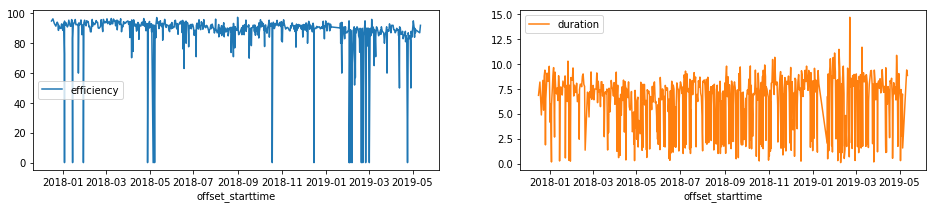

In [12]:
sleep[['efficiency', 'duration']].plot(subplots=True, layout=(3, 2),figsize=(16, 10),sharex=False,sharey=False)
plt.xticks(rotation=60)

* **Initial comments** 
    - Time offset is applied to data - local datetimes are available. 
    - Sleep data is available from two devices : 'F/D7+hL5E5' and 'jQfnryl8/B'.
    - Duration (in hrs). 
        - Mean duration is **5.89h**. Sleep duration drops to 1-5h several times.
        - An average adult needs to get 7-8h a day it appears that the individual wasn't sleeping enough. 
        - **We however need to account for daytime sleep (discussed later)**. 
        - Mean sleep efficiency is **87%** with majority of values in the 88-93% range. 
        - (Several zeros in data are are unfairly pulling the efficieny mean down)
            - **The individual sleeps well, atleast by efficiency numbers.** 
            - Studies suggest that sleep efficiency decreases with age. 
            - But studies have also found that older people take more daytime naps. 

### Sleep Start and Endtime by Hour of Day

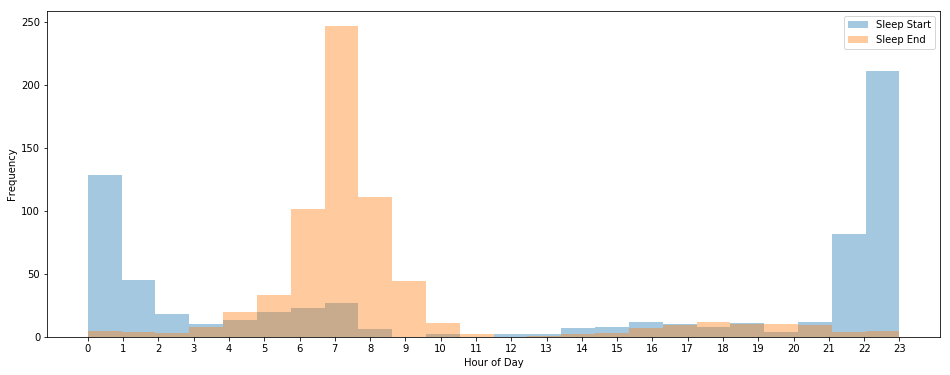

In [13]:
plt.figure(figsize=(16, 6))
sns.distplot(sleep.index.hour, kde=False, bins=24, label='Sleep Start')
sns.distplot(sleep.offset_endtime.dt.hour, kde=False, bins=24, label='Sleep End')
plt.ylabel('Frequency')
plt.xlabel('Hour of Day')
plt.xticks((np.arange(0,24)))
plt.legend()

* **Sleep Start & End**
    - Individual mostly falls asleep between 11pm and 2am. 
    - Individual mostly wakes up between 6am and 8am. 
    - **Individual takes many daytime naps!**
    - Thus it is possible that the individual is an older person who moved cities in end 2017. 
     

### Daytime vs Nighttime Sleep

Text(0, 0.5, 'Mean Duration (in h)')

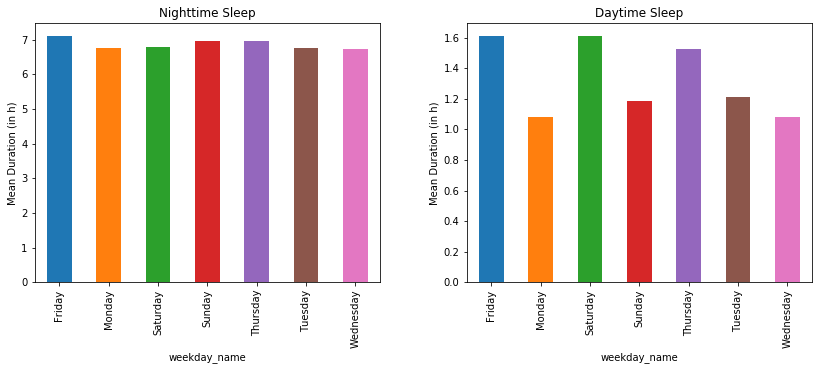

In [14]:
plt.axes([1,0,0.8,0.9])
day_sleep.groupby('weekday_name').mean()['Daytime sleep'].plot(kind='bar')
plt.title('Daytime Sleep')
plt.ylabel('Mean Duration (in h)')
plt.axes([0,0,0.8,0.9])
night_sleep.groupby('weekday_name').mean()['Nighttime sleep'].plot(kind='bar')
plt.title('Nighttime Sleep')
plt.ylabel('Mean Duration (in h)')

* 1 - 1.5h in the **daytime sleep** are logged , all days of the week. 
    - On **Thursday, Friday and Saturday** the individual logs more daytime sleep than in the rest of the week. 


* ~ 6.5-7h of sleep are logged every **night**


* **The individual thus gets on average 7.5 or more hours of high efficiency sleep everyday.** 

### Sleep duration by month and timezone

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

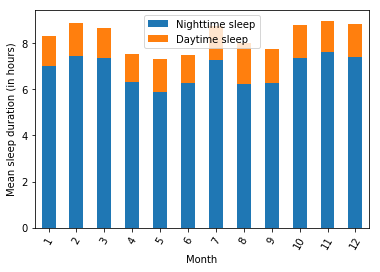

In [15]:
new.groupby(new.index.month).mean()[['Nighttime sleep','Daytime sleep']].plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Mean sleep duration (in hours)')
plt.xticks(rotation=60)

* **April - September (except July)** the individual sleeps far fewer hours in the night, than in the rest of the year. 
    - Around this time, the individual is in the UTC-0300 timezone. Thus in the figure below, we see that the chart reflects less sleep, when individual is in the UTC-0300 timezone. 


* Vacation sleep
    - Surprisingly, individual gets **no nighttime sleep at all** while on vacation in the UTC-0700 timezone! (As seen in the figure below).This is between 2017-12-20 and 2018-01-02. 
    - Individual also sleeps less while on vacation in the UTC+0300 timezone 
    - and on vacation in the UTC-0600 timezone. 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

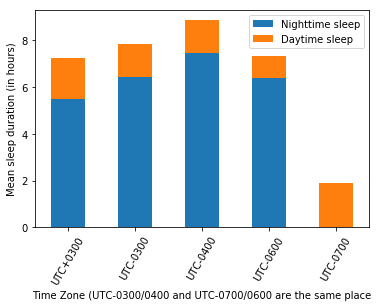

In [16]:
new.groupby('time_offset_x').mean()[['Nighttime sleep','Daytime sleep']].plot(kind='bar', stacked=True)
plt.xlabel('Time Zone (UTC-0300/0400 and UTC-0700/0600 are the same place')
plt.ylabel('Mean sleep duration (in hours)')
plt.xticks(rotation=60)

## Stress

In [17]:
explore(stress)


Head
                        time_offset end_time  deviceuuid  \
offset_starttime                                           
2017-09-16 21:28:38.271    UTC-0300      NaN  jQfnryI8/B   
2017-11-06 09:48:02.145    UTC-0400      NaN  jQfnryI8/B   
2017-11-19 20:22:27.205    UTC-0400      NaN  jQfnryI8/B   
2017-11-24 08:29:17.675    UTC-0400      NaN  jQfnryI8/B   
2017-11-25 13:52:16.773    UTC-0400      NaN  jQfnryI8/B   

                                      start_time      score  tag_id  \
offset_starttime                                                      
2017-09-16 21:28:38.271  2017-09-17 00:28:38.271  37.399870   10002   
2017-11-06 09:48:02.145  2017-11-06 13:48:02.145  68.207980   10002   
2017-11-19 20:22:27.205  2017-11-20 00:22:27.205  37.771378   10002   
2017-11-24 08:29:17.675  2017-11-24 12:29:17.675  35.755974   10002   
2017-11-25 13:52:16.773  2017-11-25 17:52:16.773  46.780807   10009   

                        offset_endtime  
offset_starttime                  

* **Initial Comments**
    - Time offset has been applied. Documentation says that tag_id represents different modes of measurement, like heartrate monitering or blood oxygen saturation levels. 
    - Device 'jQfnryI8/B' is good at measuring stress information. 
    - **Mean stress score is 29.5%**. Maximum is a very high 92%. 

### Stess scores over the timerange. 

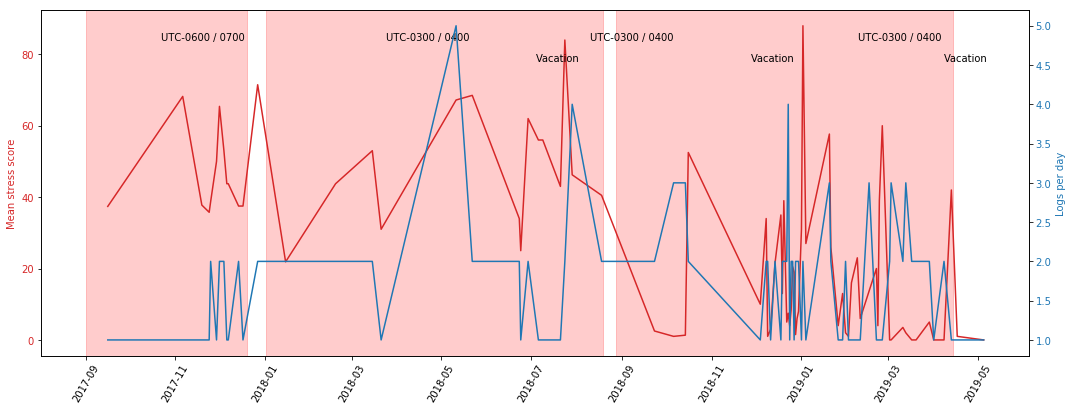

In [18]:
data1=stress.groupby(stress.index.date).mean()['score']
data2=stress.groupby(stress.index.date).count()['score']
t=stress.groupby(stress.index.date).mean().index

fig, ax1 = plt.subplots(figsize=(15, 6))
color = 'tab:red'
ax1.set_ylabel('Mean stress score', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=60)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Logs per day', color=color)  
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.axvspan('2017-09-01','2017-12-20', color='red', alpha=0.2)
ax1.axvspan('2018-01-02','2018-08-19', color='red', alpha=0.2)
ax1.axvspan('2018-08-28','2019-04-14', color='red', alpha=0.2)
ax1.annotate('UTC-0600 / 0700', xy=(.15,0.9), xycoords='figure fraction')
ax1.annotate('UTC-0300 / 0400', xy=(.36,0.9), xycoords='figure fraction')
ax1.annotate('Vacation', xy=(.5,0.85), xycoords='figure fraction')
ax1.annotate('UTC-0300 / 0400', xy=(.55,0.9), xycoords='figure fraction')
ax1.annotate('Vacation', xy=(.7,0.85), xycoords='figure fraction')
ax1.annotate('UTC-0300 / 0400', xy=(.8,0.9), xycoords='figure fraction')
ax1.annotate('Vacation', xy=(.88,0.85), xycoords='figure fraction')

fig.tight_layout()

* **Individual was very stressed between 2017-12-20 and 2018-01-02, the same time that the individual got no sleep during th night, while on vacation in the UTC-0700 timezone.**
    - The individual may be logging the data themselves or it may be auto-recorded. 
    - Stress counts per day **increased** end 2017 onwards 
    - Stress mean scores had an opposite trend, mean value was high in 2016 and **decreased** in the end of the dataset 
    - But also the highest stress value of **92% was logged in 2019**. 
    
    - The most interesting characteristic is that the mean and counts of stress score were highest during the same vacation in 2017-12-20 and 2018-01-02 when the individual got no nighttime sleep. 
        - Since we guessed that the individual had gone home for Christmas during this time - **perhaps Christmas family drama - or a family emergency or accident occured around this time.**
        
        
* It would be interesting the correlation betwen stress and sleep patterns.

### Did stress influence nighttime sleep?

C:\Users\orpit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


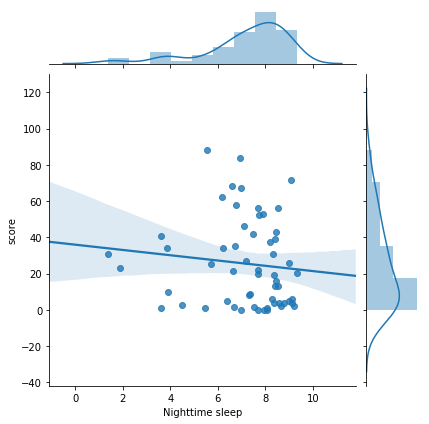

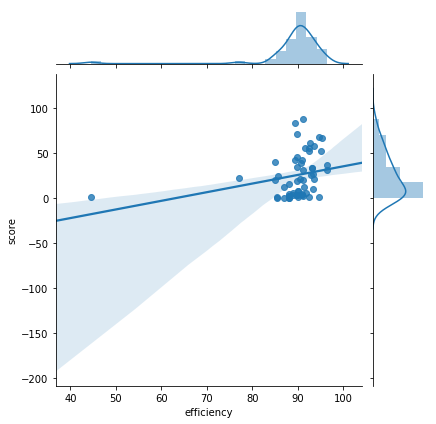

In [19]:
night_sleep_per_day=night_sleep.resample('24h').mean()
stress_per_day=stress.resample('24h').mean()['score']
sleep_stress=pd.concat([night_sleep_per_day,stress_per_day], axis=1)
sleep_stress.dropna(inplace=True)
sns.jointplot(data=sleep_stress, x='Nighttime sleep', y='score', kind='reg')
sns.jointplot(data=sleep_stress, x='efficiency', y='score', kind='reg')

* There was a **negative correlation between nighttime sleep duration and stress score  - as expected.** 
* But there was a  **positive correlation between nighttime sleep efficiency and stress score**. 
    - The person makes up for lost sleep duration by sleeping better.  
        - This may be a healthy young person with few anxieties that ruin the person's sleep quality. 

## Exercise

### Exercise Type vs Duration

Text(0.5, 0, 'Duration (in hours)')

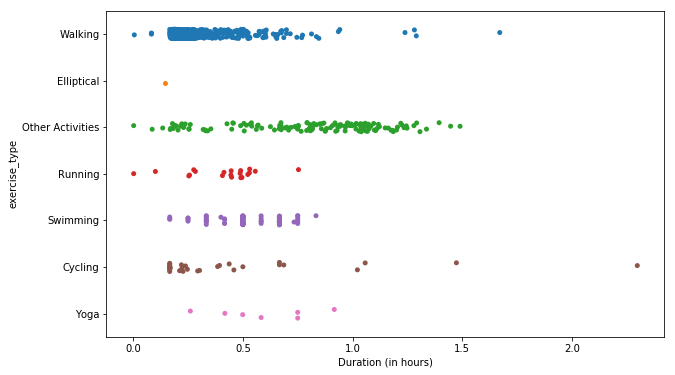

In [20]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=exercise, x='duration', y='exercise_type')
plt.xlabel('Duration (in hours)')

* **Summary of Exercise Types**
    - Individual does some Swimming, Running, Cycling and Yoga. 
    - But majority of 'exercise' in this dataset is 'Walking' or 'Other Activities'. It is not clear what 'Other Activities' are. 
    - In conclusion, **individual is not too atheletically inclined overall.** in this timerange.

### Exercise duration over time

Text(0.87, 0.8, 'Vacation')

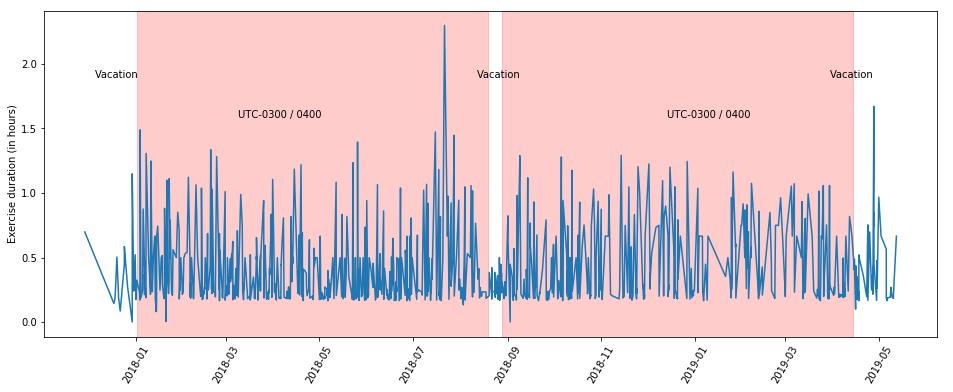

In [21]:
plt.figure(figsize=(16, 6))
plt.plot(exercise.index, exercise['duration'])
plt.xticks(rotation=60)
plt.ylabel('Exercise duration (in hours)')
plt.axvspan('2018-01-02','2018-08-19', color='red', alpha=0.2)
plt.axvspan('2018-08-28','2019-04-14', color='red', alpha=0.2)
plt.annotate('Vacation', xy=(.1,0.8), xycoords='figure fraction')
plt.annotate('UTC-0300 / 0400', xy=(.25,0.7), xycoords='figure fraction')
plt.annotate('Vacation', xy=(.5,0.8), xycoords='figure fraction')
plt.annotate('UTC-0300 / 0400', xy=(.7,0.7), xycoords='figure fraction')
plt.annotate('Vacation', xy=(.87,0.8), xycoords='figure fraction')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

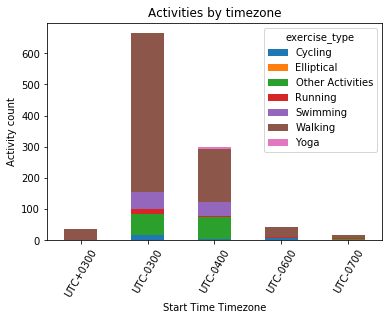

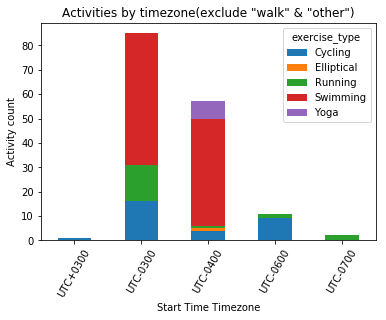

In [22]:
exercise.groupby(['time_offset','exercise_type']).count()['duration'].unstack().plot(kind='bar', stacked=True)
plt.title('Activities by timezone')
plt.xlabel('Start Time Timezone')
plt.ylabel('Activity count')
plt.xticks(rotation=60)
exercise_sub.groupby(['time_offset','exercise_type']).count()['duration'].unstack().plot(kind='bar', stacked=True)
plt.title('Activities by timezone(exclude "walk" & "other")')
plt.xlabel('Start Time Timezone')
plt.ylabel('Activity count')
plt.xticks(rotation=60)

* **Exercise duration and types** 
    - The individual walks a large amount. Swimming is the next most popular activity.
    - On vacation the individual continues **running and cycling**. 
    
* See figure below:
* **Yoga: In the few days between 2019-01-31 and 2019-02-06,  individual tried a few 'classes'.**
* **Running: A few runs are logged, all days of the week. The individual runs April-October (and December), but not during the cold months
* **Swimming: 30 minutes or 40 minutes mostly, are logged, all months of the year, all days of the week. **
* The individual also tries using the Elliptical machine one time. 

(736634.0, 737194.0)

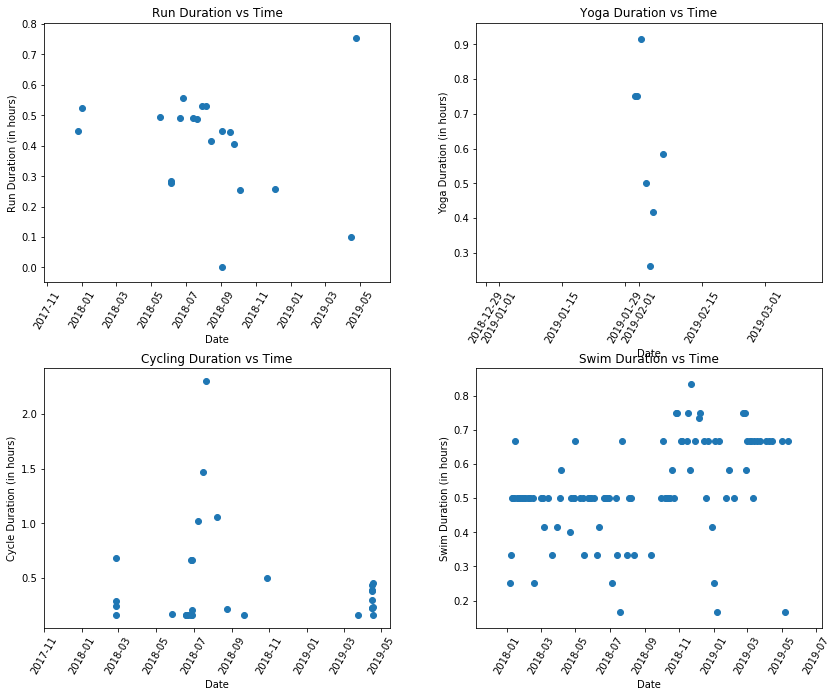

In [23]:
plt.axes([0,1.2,0.8,0.9])
plt.scatter(run.index,run['duration'])
plt.title('Run Duration vs Time')
plt.xlabel('Date')
plt.ylabel('Run Duration (in hours)')
plt.xticks(rotation=60)
#plt.xlim('2017-11-01','2019-05-15')
plt.axes([1,0,0.8,0.9])
plt.scatter(swim.index,swim['duration'])
plt.title('Swim Duration vs Time')
plt.xlabel('Date')
plt.ylabel('Swim Duration (in hours)')
plt.xticks(rotation=60)
#plt.xlim('2017-11-01','2019-05-15')
plt.axes([1,1.2,0.8,0.9])
plt.scatter(yoga.index,yoga['duration'])
plt.title('Yoga Duration vs Time')
plt.xlabel('Date')
plt.ylabel('Yoga Duration (in hours)')
plt.xticks(rotation=60)
#plt.xlim('2017-11-01','2019-05-15')
plt.axes([0,0,0.8,0.9])
plt.scatter(cycle.index,cycle['duration'])
plt.title('Cycling Duration vs Time')
plt.xlabel('Date')
plt.ylabel('Cycle Duration (in hours)')
plt.xticks(rotation=60)
plt.xlim('2017-11-01','2019-05-15')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

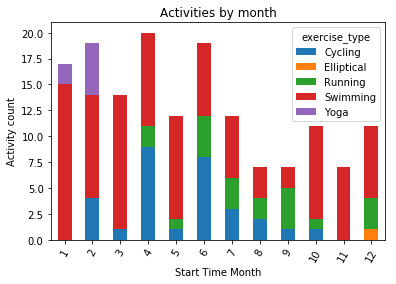

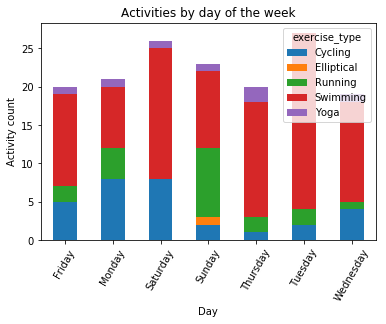

In [24]:
exercise_sub.groupby([exercise_sub.index.month,'exercise_type']).count()['duration'].unstack().plot(kind='bar', stacked=True)
plt.title('Activities by month')
plt.xlabel('Start Time Month')
plt.ylabel('Activity count')
plt.xticks(rotation=60)
exercise_sub.groupby([exercise_sub.index.weekday_name,'exercise_type']).count()['duration'].unstack().plot(kind='bar', stacked=True)
plt.title('Activities by day of the week')
plt.xlabel('Day')
plt.ylabel('Activity count')
plt.xticks(rotation=60)

### Exercise  by time of day

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

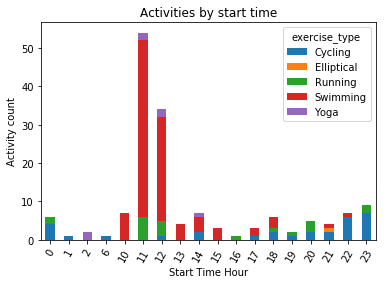

In [25]:
exercise_sub.groupby([exercise_sub.index.hour,'exercise_type']).count()['duration'].unstack().plot(kind='bar', stacked=True)
plt.title('Activities by start time')
plt.xlabel('Start Time Hour')
plt.ylabel('Activity count')
plt.xticks(rotation=60)

* Individual prefers to **swim and run between 10am-1pm mostly**. 


* Majority of **cycling was done late at night**


* **No activity between 3-5am, 7-8am** as would be expected. **(Note: no offset has been applied to this dataset, 'walking' and 'other activities' have been removed. Timerange is 2017-09 onwards)** 

## Step

### Information about devices, accuracy of measurement?

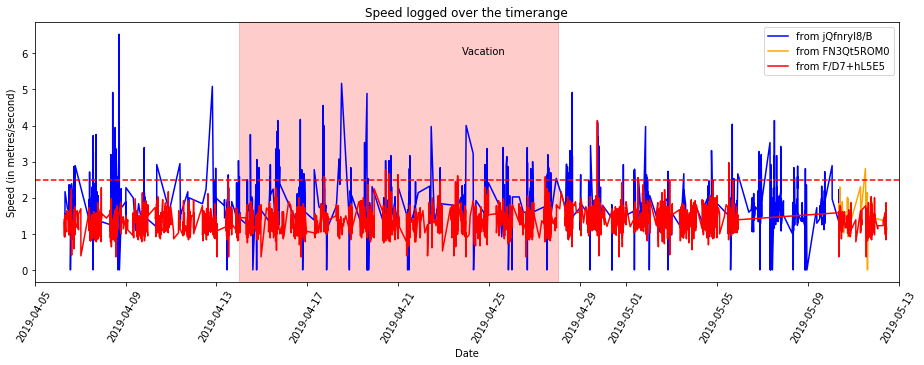

In [26]:
step_sub3=step[step['deviceuuid']=='F/D7+hL5E5']
step_sub2=step[step['deviceuuid']=='FN3Qt5ROM0']
step_sub=step[step['deviceuuid']=='jQfnryI8/B']
ax=plt.axes([0,0.05,2,0.9])
plt.plot(step_sub.index,step_sub['speed'], 'blue', label='from jQfnryI8/B')
plt.plot(step_sub2.index,step_sub2['speed'], 'orange', label='from FN3Qt5ROM0')
plt.plot(step_sub3.index,step_sub3['speed'], 'red', label='from F/D7+hL5E5')
plt.xlabel('Date')
plt.title('Speed logged over the timerange')
plt.ylabel('Speed (in metres/second)')
plt.xticks(rotation=60)
plt.xlim('2019-04-05','2019-05-13')
ax.axhline(y=2.5, linestyle='--', color='red')
plt.axvspan('2019-04-14','2019-04-28', color='red', alpha=0.2)
plt.annotate('Vacation', xy=(.5,0.85), xycoords='figure fraction')
plt.legend()

* **Devices** 
    - Sleep data is available from three devices : 'F/D7+hL5E5', 'FN3Qt5ROM0' and 'jQfnryl8/B'.
    - 'FN3Qt5ROM0' is used as a replacement for 'jQfnryl8/B' at the end of the dataset. 
 
    
* **Device Accuracy?** 
    - The range of speed values from 'FN3Qt5ROM0' and 'jQfnryl8/B' is higher than values from 'F/D7+hL5E5'. 
    - 'F/D7+hL5E5' - the wrist device like a Samsung watch - is missing data towards the end of timerange.
    - **To prevent bias in the data, timerange after 2019-05-06 is excluded from analysis.**

  
* **Running+Jogging vs walking**
    - Literature says that average walking pace is ~1.4m/s, while 1.7-1.8m/s is considered brisk walking pace. ~2.5m/s is considered average jogging pace for humans. 
    - The dataset does show many point where the individual **jogs at speeds > 2.5m/s**.
    - However, this data comes from only one device. The other device shows **lower speeds : discrepency**. 
    
    
* **From the exercise dataset we know that the individual does run, though infrequently.**
    - So perhaps device 'F/D7+hL5E5' has a upper limit for speed measurements. 
    - Or perhaps it is a phone, and the individual doesn't take it along for runs. 
    - **So we will assume that the data is fine.**


In [27]:
# Eliminate end of dataset
step=step[:'2019-05-05']

# Separate out runs (all records where speed > 2.5m/s)
speed=step[step['speed']>2.5]

### Correlation analysis of entire dataset walks+jogging/runs

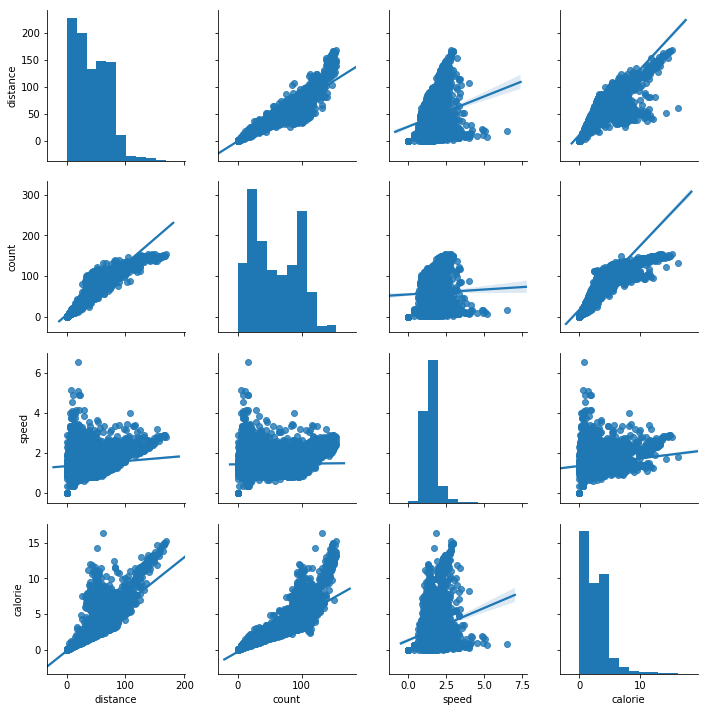

In [28]:
sns.pairplot(step, kind='reg')

### Correlation analysis of only jogging/runs dataset

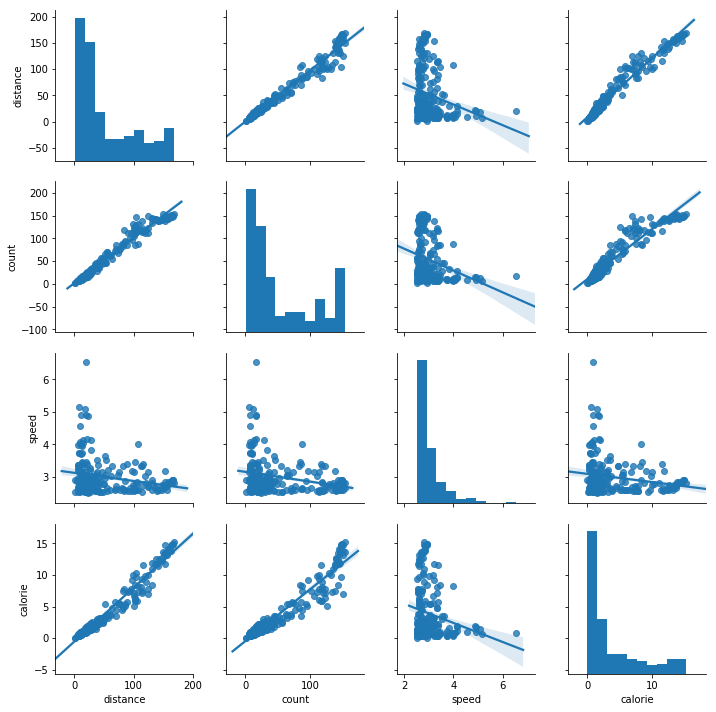

In [29]:
sns.pairplot(speed, kind='reg')

* **Walks+jogging/runs dataset**
    - **Distance, calories and step count are positively correlated** with each other. 
    - Speed has a small positive correlation with calories and distance.
    
    
* **Jogging/runs dataset**
    - **Distance, calories and step count are strongly positively correlated** with each other. 
    - **Speed has a negative correlation with Distance, calories and step count.**   
    
    
* This is a reasonable result. 


In [30]:
print('Mean pace for running (when speed >2.5) is %3.2f m/s. ' %step[step['speed']>2.5]['speed'].mean())
print('Maximum pace for running (when speed >2.5) is %3.2f m/s.' %step[step['speed']>2.5]['speed'].max())

Mean pace for running (when speed >2.5) is 2.99 m/s. 
Maximum pace for running (when speed >2.5) is 6.53 m/s.


### Calorie burn rate

In [31]:
print('Mean calories burnt per minute when speed clocked is > 2.5m/s is : {}kcal/min'.format(round(speed['calorie'].mean()),2))

Mean calories burnt per minute when speed clocked is > 2.5m/s is : 4kcal/min


* The stepcount dataset provides calories burnt over 1 minute intervals. 
* Mean calories burnt per minute during high intensity physical activity (like running)
can  help us guess the gender of the individual. 
* Men have higher muscle mass thus higher metabolism than women. **Men burn ~4 kilocalories per minute during high intensity activity while women burn ~2.76 kilocalories per minute**. 


* This this individual is likely a **man**. 

### Resampled (per hour) distance, count & calories

Text(0.5, 0.3, 'Vacation')

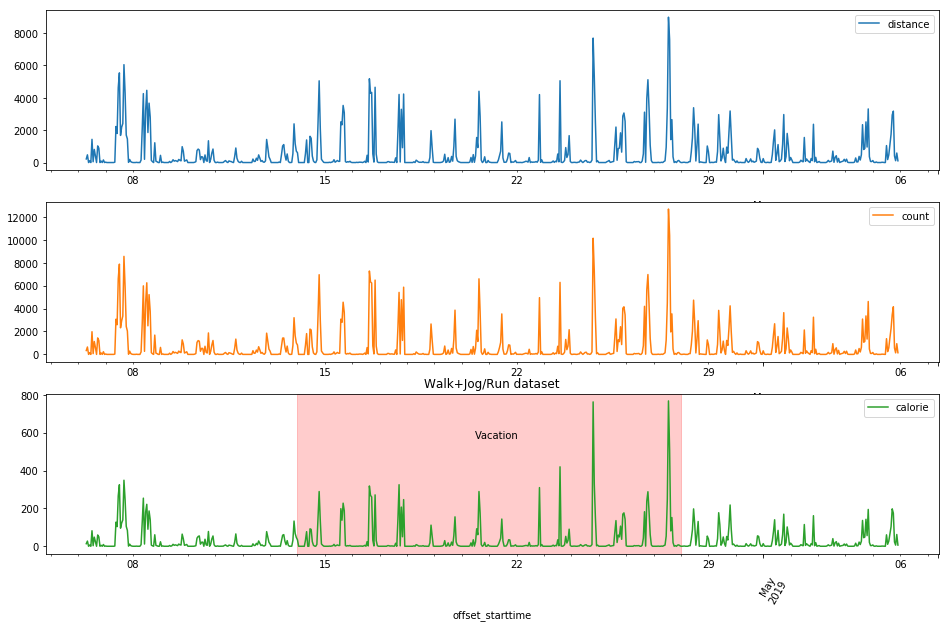

In [32]:
step_resample=step.resample('1h').sum()
step_resample[['distance', 'count','calorie']].plot(subplots=True, layout=(3, 1),figsize=(16, 10),sharex=False,sharey=False)
plt.title('Walk+Jog/Run dataset')
plt.xticks(rotation=60)
plt.axvspan('2019-04-14','2019-04-28', color='red', alpha=0.2)
plt.annotate('Vacation', xy=(.5,0.3), xycoords='figure fraction')


Text(0.5, 0.3, 'Vacation')

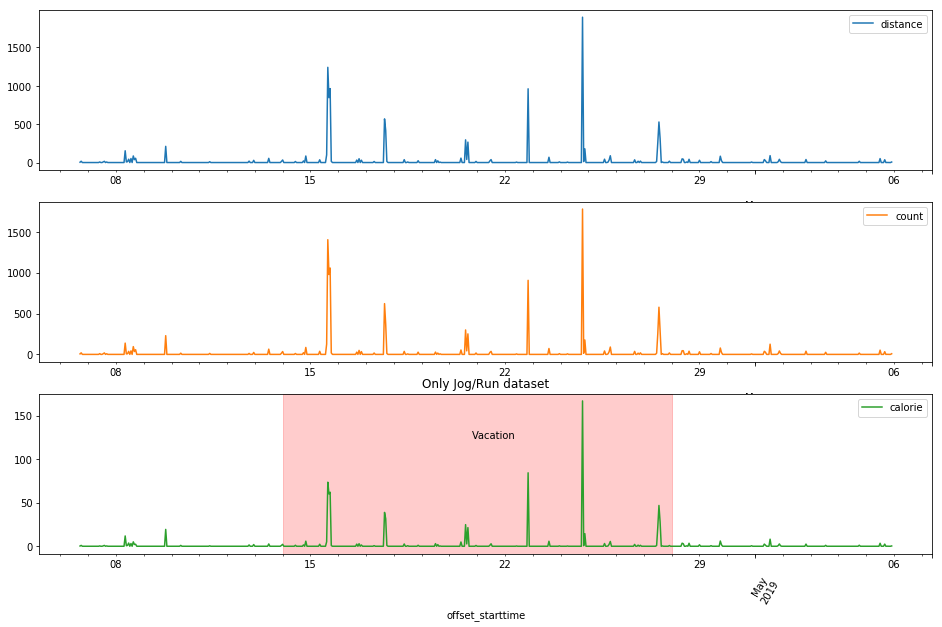

In [33]:
speed_resample=speed.resample('1h').sum()
speed_resample[['distance', 'count','calorie']].plot(subplots=True, layout=(3, 1),figsize=(16, 10),sharex=False,sharey=False)
plt.title('Only Jog/Run dataset')
plt.xticks(rotation=60)
plt.axvspan('2019-04-14','2019-04-28', color='red', alpha=0.2)
plt.annotate('Vacation', xy=(.5,0.3), xycoords='figure fraction')

* **Walks+jogging/runs dataset**
    - **One prominent peak per day** is observed from resampled (per hour) data over time - for distance, count and calories.
    - The individual walks regularly. 
    
    
* **Jogging/runs dataset**
    - **During vacation the individual runs regularly.**
    - **This data agrees with our observations from the exercise dataset.**
    - The step_trend_daily dataset too matches to some extent as shown below. (there are some run time peaks in the vacation time range) 

### Step Trend Daily

Text(0.5, 1.0, 'Run Time from the Step Trend Daily dataset')

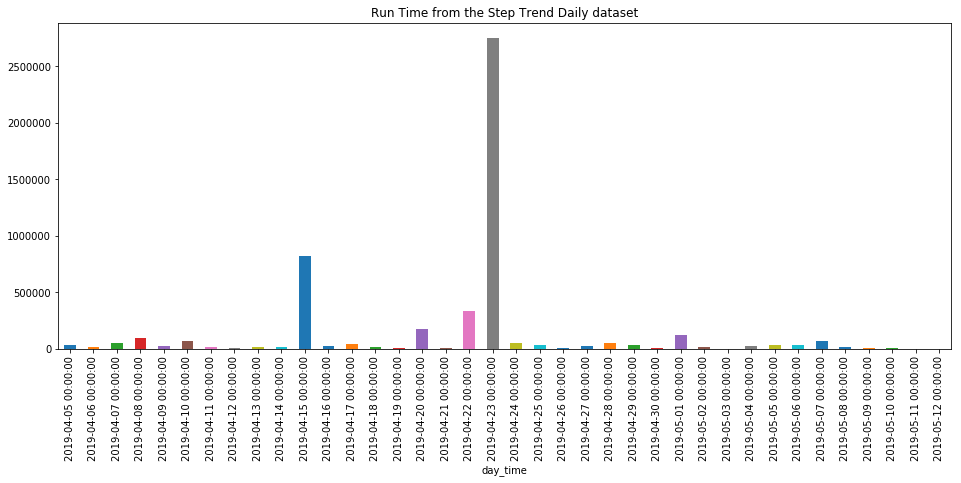

In [34]:
plt.figure(figsize=(16, 6))
day['2019-04-05':'2019-05-13']['run_time'].plot('bar')
plt.title('Run Time from the Step Trend Daily dataset')

### Zooming in on vacation perios

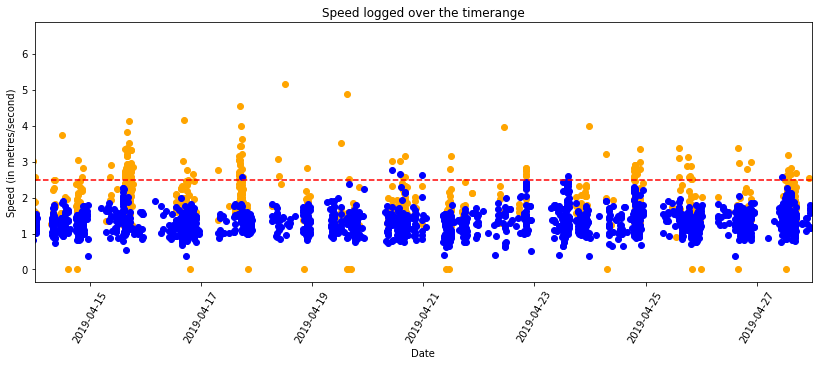

In [35]:
ax=plt.axes([0,0.05,1.8,0.9])
plt.scatter(step_sub.index,step_sub['speed'], color='orange')
plt.scatter(step_sub3.index,step_sub3['speed'], color='blue')
plt.xlabel('Date')
plt.title('Speed logged over the timerange')
plt.ylabel('Speed (in metres/second)')
plt.xticks(rotation=60)
plt.xlim('2019-04-14','2019-04-28')
ax.axhline(y=2.5, linestyle='--', color='red')

In [36]:
print('In the entire dataset: ')
print('Mean pace for running (when speed >3) is %3.2f m/s. ' %step[step['speed']>2.5]['speed'].mean())
print('Maximum pace for running (when speed >3) is %3.2f m/s.' %step['speed'].max())

In the entire dataset: 
Mean pace for running (when speed >3) is 2.99 m/s. 
Maximum pace for running (when speed >3) is 6.53 m/s.


### What time of day does the individual run?

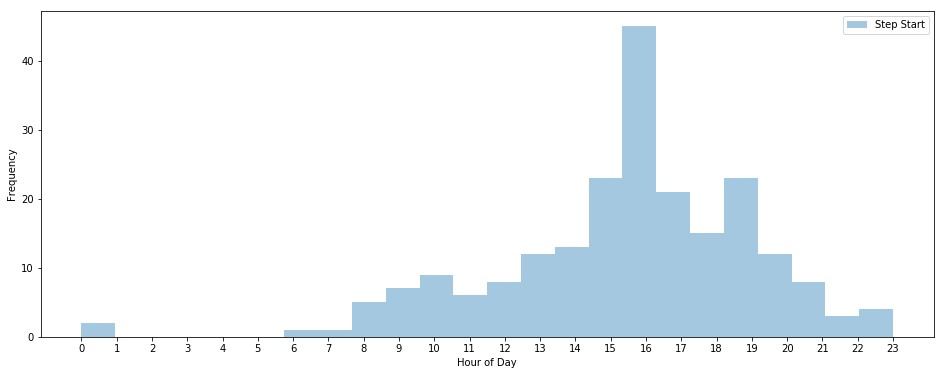

In [37]:
plt.figure(figsize=(16, 6))
sns.distplot(speed.index.hour, kde=False, bins=24, label='Step Start')
plt.ylabel('Frequency')
plt.xlabel('Hour of Day')
plt.xticks((np.arange(0,24)))
plt.legend()

* While in **2018 the individual preferred to run 11am-12pm (exercise dataset), in 2019 the individual prefers to run between 3pm - 7pm.** 


* It apprear that the individual is interested in getting fitter. 

## Heart Rate

### Descriptive statistics for Heart Rate

Heart Rate from discrete data
Mean:  60.734221049593934 bpm
Maximum:  177.0 bpm
Minimum:  41.0 bpm


count    24257.000000
mean        60.734221
std          8.484780
min         41.000000
25%         55.000000
50%         59.000000
75%         65.000000
max        177.000000
Name: heart_rate, dtype: float64

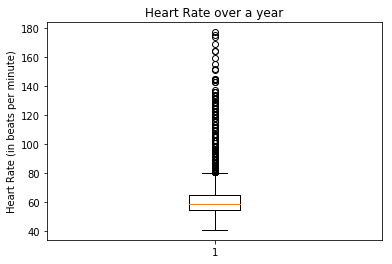

In [38]:
print('Heart Rate from discrete data')
print('Mean: ', heartrate['heart_rate'].mean(), 'bpm')
print('Maximum: ', heartrate['heart_rate'].max(), 'bpm')
print('Minimum: ', heartrate['heart_rate'].min(), 'bpm')
plt.boxplot(heartrate['heart_rate'])
plt.ylabel('Heart Rate (in beats per minute)')
plt.title('Heart Rate over a year')
heartrate['heart_rate'].describe()

* A regular person has a resting heart rate of ~60-100bpm, this individual has a **mean heart rate of 60.7 bpm too**. 
* Person does show some high heart rates of 100-177bpm. Literature suggests that the maximum normal heart rate is (220bpm-age). If 177 in individual's maximum heart rate, the person will be ~43 yrs old. 

### Heartrate over time

Text(0.87, 0.8, 'Vacation')

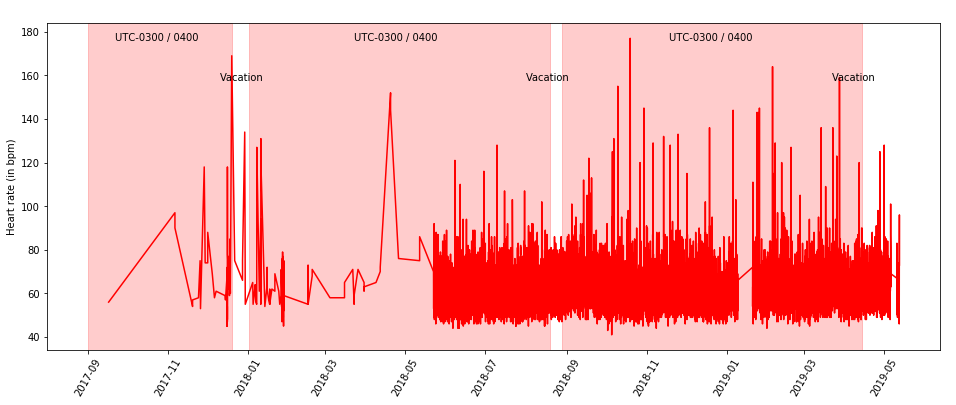

In [39]:
plt.figure(figsize=(16, 6))
plt.plot(heartrate.index,heartrate['heart_rate'], label='heart rate', color='red')
plt.xticks(rotation=60)
plt.ylabel('Heart rate (in bpm)')
plt.axvspan('2017-09-01','2017-12-20', color='red', alpha=0.2)
plt.axvspan('2018-01-02','2018-08-19', color='red', alpha=0.2)
plt.axvspan('2018-08-28','2019-04-14', color='red', alpha=0.2)
plt.annotate('UTC-0300 / 0400', xy=(.12,0.9), xycoords='figure fraction')
plt.annotate('Vacation', xy=(.23,0.8), xycoords='figure fraction')
plt.annotate('UTC-0300 / 0400', xy=(.37,0.9), xycoords='figure fraction')
plt.annotate('Vacation', xy=(.55,0.8), xycoords='figure fraction')
plt.annotate('UTC-0300 / 0400', xy=(.7,0.9), xycoords='figure fraction')
plt.annotate('Vacation', xy=(.87,0.8), xycoords='figure fraction')

* **High heart rate during traumatic vacation of 2017-12-20 and 2018-01-02.**


* Also **high heart rate in 2019**. Trends are similar to stress trends. 

### Correlation of Heart Rate & Stress/Step Count

C:\Users\orpit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


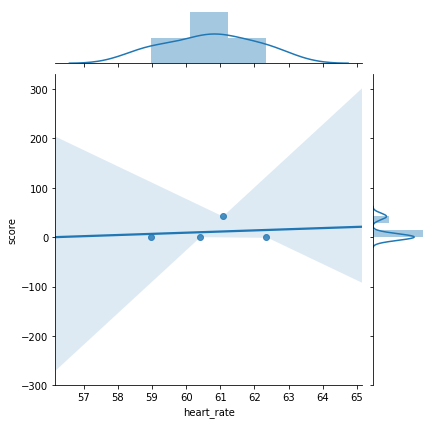

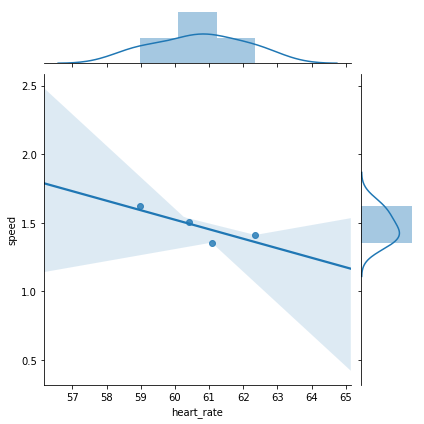

In [40]:
stress_per_day=stress.resample('24h').mean()['score']
heartrate_per_day=heartrate.resample('24h').mean()['heart_rate']
step_per_day=step.resample('24h').mean()['speed']
sleep_stress=pd.concat([stress_per_day, heartrate_per_day, step_per_day], axis=1)
sleep_stress.dropna(inplace=True)
sns.jointplot(data=sleep_stress, x='heart_rate', y='score', kind='reg')
sns.jointplot(data=sleep_stress, x='heart_rate', y='speed', kind='reg')

* **Too few overlapping datapoints to make any conclusions.** 

## Floors

### Floor data over time

Text(0.87, 0.8, 'Vacation')

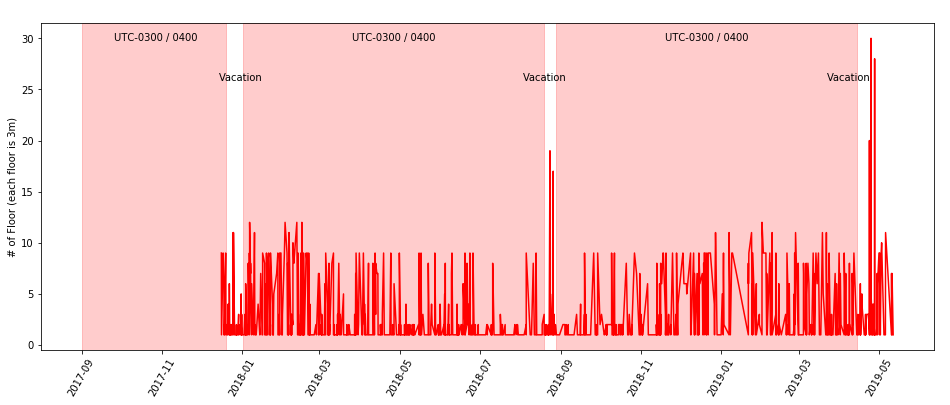

In [41]:
plt.figure(figsize=(16, 6))
plt.plot(floors.index,floors['floor'], color='red')
plt.xticks(rotation=60)
plt.ylabel('# of Floor (each floor is 3m)')
plt.axvspan('2017-09-01','2017-12-20', color='red', alpha=0.2)
plt.axvspan('2018-01-02','2018-08-19', color='red', alpha=0.2)
plt.axvspan('2018-08-28','2019-04-14', color='red', alpha=0.2)
plt.annotate('UTC-0300 / 0400', xy=(.12,0.9), xycoords='figure fraction')
plt.annotate('Vacation', xy=(.23,0.8), xycoords='figure fraction')
plt.annotate('UTC-0300 / 0400', xy=(.37,0.9), xycoords='figure fraction')
plt.annotate('Vacation', xy=(.55,0.8), xycoords='figure fraction')
plt.annotate('UTC-0300 / 0400', xy=(.7,0.9), xycoords='figure fraction')
plt.annotate('Vacation', xy=(.87,0.8), xycoords='figure fraction')

### Altitude data from exercise dataset match floors dataset

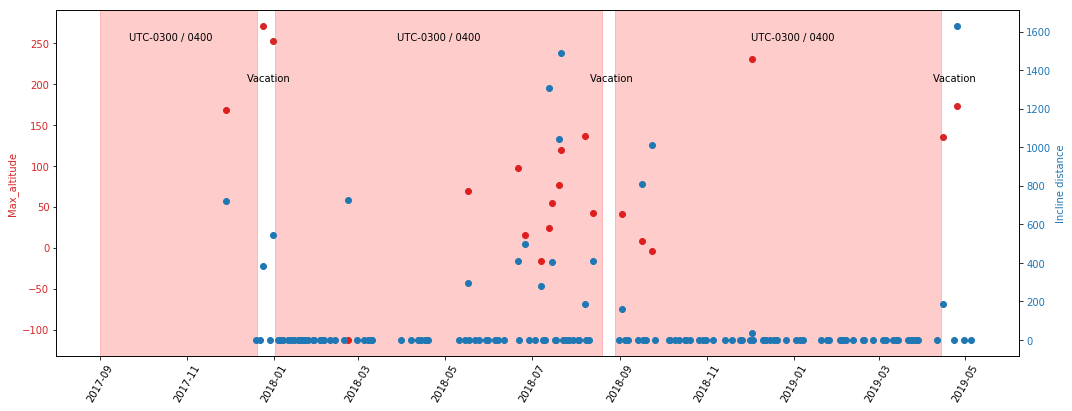

In [42]:
data1=exercise.groupby(exercise.index.date).mean()['max_altitude']
data2=exercise.groupby(exercise.index.date).mean()['incline_distance']
t=exercise.groupby(exercise.index.date).mean().index

fig, ax1 = plt.subplots(figsize=(15, 6))
color = 'tab:red'
ax1.set_ylabel('Max_altitude', color=color)
ax1.scatter(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=60)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Incline distance', color=color)  
ax2.scatter(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.axvspan('2017-09-01','2017-12-20', color='red', alpha=0.2)
ax1.axvspan('2018-01-02','2018-08-19', color='red', alpha=0.2)
ax1.axvspan('2018-08-28','2019-04-14', color='red', alpha=0.2)
ax1.annotate('UTC-0300 / 0400', xy=(.12,0.9), xycoords='figure fraction')
ax1.annotate('Vacation', xy=(.23,0.8), xycoords='figure fraction')
ax1.annotate('UTC-0300 / 0400', xy=(.37,0.9), xycoords='figure fraction')
ax1.annotate('Vacation', xy=(.55,0.8), xycoords='figure fraction')
ax1.annotate('UTC-0300 / 0400', xy=(.7,0.9), xycoords='figure fraction')
ax1.annotate('Vacation', xy=(.87,0.8), xycoords='figure fraction')

fig.tight_layout()

* Individual gains altitude during vacation activities


* **Floors climbed > 10, represents altitude gained during cycling, running and walking activities during vacation.**


* **Floors climbed < 10, represents altitude variation encountered during everyday activities.**

Text(0.5, 1.0, 'Heart Rate vs Floor Count (no correlation)')

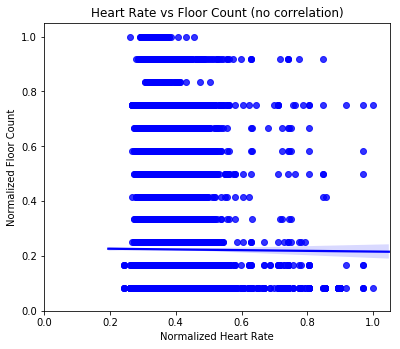

In [43]:
plt.axes([1.2,0,0.8,1])
merge=pd.merge(heartrate,floors, how='inner', left_on=heartrate.index.date, right_on=floors.index.date)
sns.regplot(merge['heart_rate']/169,merge['floor']/12, label='floor count', color='blue')
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.xlabel('Normalized Heart Rate')
plt.ylabel('Normalized Floor Count')
plt.title('Heart Rate vs Floor Count (no correlation)')

* No correlation observed between heartrate and floorcount. This leads me to think that either of these two datasets may not be good. 

## Calories

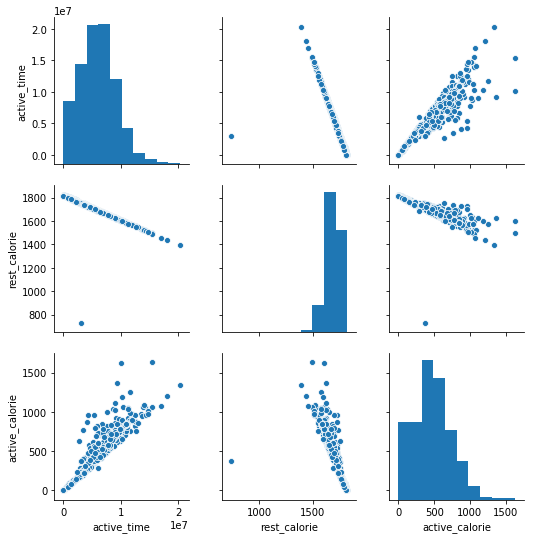

In [44]:
sns.pairplot(calories)

* There is positive correlation between active time and active calories.

## Day Summary

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

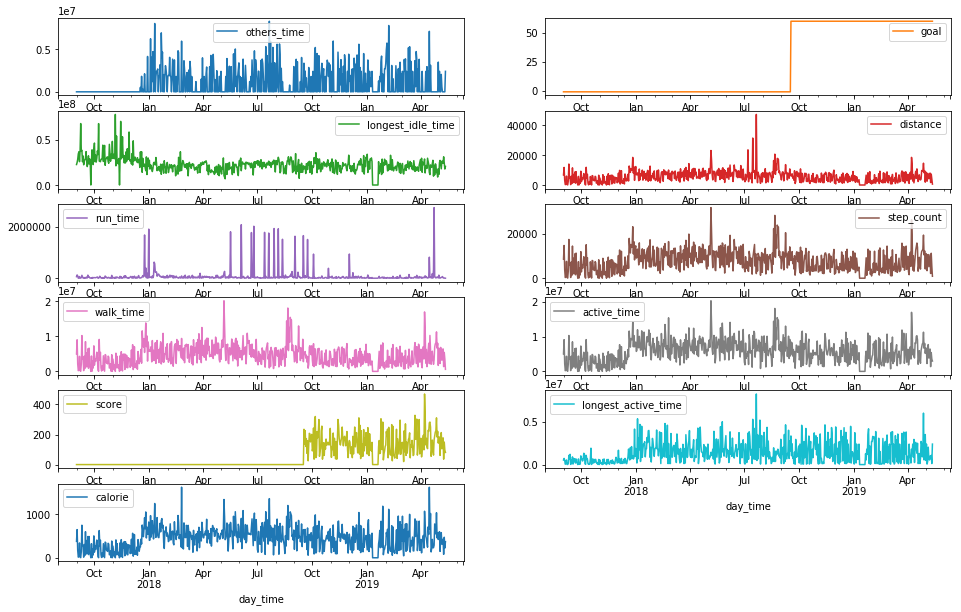

In [45]:
day.plot(subplots=True, layout=(6, 2),figsize=(16, 10),sharex=False,sharey=False)
plt.xticks(rotation=60)

### Conclusion

* **Age**
    - Individual may be **~43 yrs old** in 2019, based on calculations from maximum heart rate data. 
    - Older people tend to take more daytime naps according to research. 
    
    
* **Gender**
    - Individual is **likely a man**. Men burn ~4 calories per minute during high intensity activity while women burn ~2.76 calories per minute. The mean 4kcal/min burnt by individual when jogging/running, in the step_count dataset helped me arrive at this conclusion. 
    
    
* **Location**
    - He lives in UTC-0300/UTC-0400 timezone as of May 2019. He **moved here on 2017-03-06** from a city in timezone UTC-0600/UTC-0700. He is likely **Canadian or lives in Bermuda** (only regions that follow Atlantic time AND enjoy daylight savings). 
   
   
* **Urban/Rural**
    - He would likely live in **New Brunswick, Nova Scotia or Prince Edward Island in a populated area**. Individual is active walking, cycling, running outdoors (hundres of incline_distance in exercise dataset) between February - October. In the Eastern povinces of Canada, the hundreds of kilomitres of walking are likely in a populated area with paths that have snow removal. The individual also enjoys yoga classes (sounds like an urban rather than rural location, especially in sparsely populated Eastern Canada) and regular swimming throughout the year (has an indoor pool available). 
    
    
* **Hometowm**
    - The individual originally lives in the **UTC-0600/UTC-0700 timezone**. He still has close associates in the city he moved from, as he traveled back for visits in the ~1.5 year timerange in my dataset. And one of these visits is during Christmas, when people spend time with family.


* **Job**
    - Individual likely works a job with **flexible hours**. **Early mornings (7-8am)** are times when he is least active and isn't sleeping so this is likely when he works. In 2019 he used to run in the late afternoons, in 2018 he wold run 11-1pm and he walks at all hours of day so he doesn't have a 9-5 job. He could be a postman - but he has a **high-stress job** and has a high heart rate in 2019. So a postman is less likely. A food industry job seems like a likely option. 


* **Vacation 1** **Traumatic Life Event**
    - Back home for Christmas or for a family emergency situation in the UTC-0600/UTC-0700 timezone. 
    - High heart rate during traumatic vacation between 2017-12-20 and 2018-01-02. High levels of stress logged. 
    - No nighttime sleep at all. Perhaps nursing a sick family member through the night. 
    - Only short sleep in the daytime during this vacation. 


* **Vacation 2**
    - Mountain vacation to a place in UTC+0300 timezone. Both floors dataset and the exercise dataset show **altitude gain** and **altitude loss** in this timerange. Sleeps less on vacation. 
    
    
* **Vacation 3**
    - He goes back home to the UTC-0600/UTC-0700. He runs everyday during this vacation. Sleeps less on vacation. On vacation the individual continues running and cycling. 
    
    
* **Devices**
    - 'F/D7+hL5E5' : Person purchased a wrist device in start of 2018. Maybe a Samsung watch. Great for altitude measurement. Doesn't detect high speeds.

    - 'jQfnryl8/B' : measures heartrate and stress. This device is with the individual all the time and is replaced immediatelywhen unavailable. Perhaps it is a mobile phone with a heart rate sensor. 
    
    - 'FN3Qt5ROM0' : is used as a replacement device for 'jQfnryl8/B' at the end of 2019. It is likely an old phone that is reused when 'jQfnryl8/B' is out of service. (It isn't a secondhand device purchased in 2019 because exercise trends from this device, from the early part of the dataset (2016-2017), are consistent with trends from the other devices he owns)
    
    - 'VfS0qUERdZ' shows up in only the step_trend_daily dataset and has been ignored from analysis.
    
    
* **Favourite activities**
    - Walking
    - Swimming (30 minutes or 40 minutes mostly, between 10am-1pm mostly.)
    - Cycling (Majority is done late at night)
    - Running is a new interest at the end of the dataset. 
    - Yoga - between 2019-01-31 and 2019-02-06, individual tried a few 'classes'
   
   
* **Other charactaristics**
    - Individual gets 7.5 hours or more hours of high efficiency sleep everyday. 
    - He likes taking daytime naps, especially on the weekends. 
    - He sleeps less April - September (except July) 


* **Statistics**
    - Stress counts per day increased end 2017 onwards
    - Stress mean scores had an opposite trend, mean value was high in 2016 and decreased in the end of the dataset
    - Yet the highest stress value of 92% was logged in 2019.
    - There was a negative correlation between nighttime sleep duration and stress score - as expected.
    - But there was a positiove correlation between nighttime sleep efficiency and stress score.
    - Mean heart rate of 60.7 bpm too. Maximum heartrate of 177bpm. 
    - At low speeds, positive correlation with calories burnt, distance covered. At high speed, negative correlation with distance, calories and step count.
    - His mean pace for running (when speed >2.5) is 2.99 m/s and his maximum pace is 6.53 m/s.
